In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"
!unzip "data.zip"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from '/usr/local/lib/python3.7/dist-packages/PIL/Image.py'>

In [ ]:
# 데이터를 불러올 함수를 정의합니다.
def load_CIFAR10(path):
    
    path = path
    images = []
    labels = []
    for filename in glob(path +"*"):
        for img in glob(filename + "/*.jpg"):
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
            label = filename.split('/')[6] #get label
            labels.append(label) #append label
    images = np.array(images)
    labels = np.array(labels)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels= le.fit_transform(labels)
    labels = labels.reshape(-1,1)
    
    return images, labels

In [ ]:
training_images, training_labels = load_CIFAR10(path="/content/drive/MyDrive/Colab Notebooks/train/") # path를 다음과 같이 train 폴더로 설정합니다.

In [ ]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", training_labels.shape)

train 이미지 크기: (50000, 32, 32, 3)
train 라벨 크기: (50000, 1)


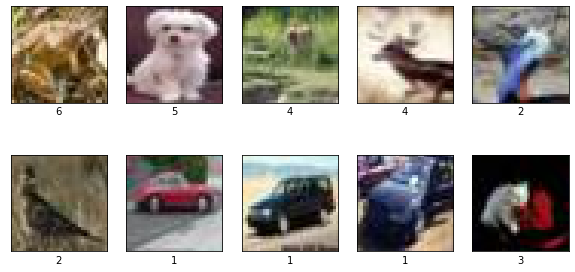

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
for i in range(10):
    import random
    num = random.randint(0,50000)
    plt.subplot(2, 5, i + 1) #nrow=2,ncol=5,index는 왼쪽 위부터 1로 시작하여 오른쪽으로 가면 1씩 늘어난다.
    plt.grid(False) #Not showing grid lines
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(training_labels[num][0])
    plt.imshow(training_images[num])
plt.show()

In [ ]:
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

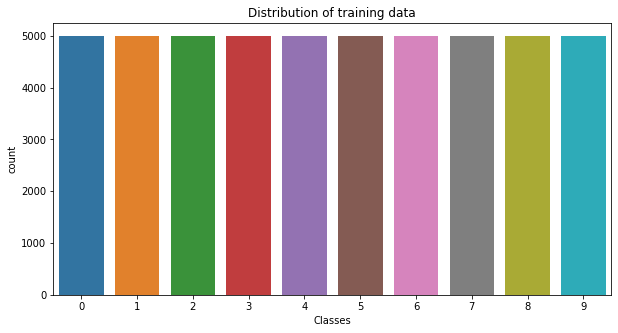

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(training_labels.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당

In [ ]:
#create train data
path="/content/drive/MyDrive/Colab Notebooks/train/"
training_images=[]
training_labels=[]
for filename in glob(path+'*'):
   for img in glob(filename+'/*.jpg'):
      an_img = PIL.Image.open(img) #read img
      img_array = np.array(an_img) #img to array
      training_images.append(img_array) #append array to training_images
      label = filename.split('/')[6] #get label
      training_labels.append(label) #append label
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)
    

In [ ]:
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#create test data
def load_CIFAR10_test(path):
    
    path = path
    images = []
    labels = []
    for img in glob(path +"*.jpg"):
        
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
            label = img.split('/')[5] #get label
            labels.append(label) #append label
    images = np.array(images)
    labels = np.array(labels)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels= le.fit_transform(labels)
    labels = labels.reshape(-1,1)
    
    return images, labels

In [ ]:
test_images,test_labels=load_CIFAR10_test(path="/content/drive/MyDrive/Colab Notebooks/test/")

In [ ]:
#test 데이터 확인
print("test_images shape:",test_images.shape)
print("test_labels shape:",test_labels.shape)

test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


In [ ]:
np.unique(test_labels)

array([0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

X_test = test_images

#sklearn.model_selection.train_test_split(*arrays(여러 개 가능), test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
#test_size float or int, default=None
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
#Returns :splittinglist, length=2 * len(arrays) List containing train-test split of inputs.

In [ ]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (40000, 32, 32, 3)
X_valid 크기: (10000, 32, 32, 3)
X_test  크기: (10000, 32, 32, 3)


In [ ]:
y_train.shape

(40000, 1)

In [ ]:
X_train[0]

array([[[109, 110, 104],
        [101, 102,  96],
        [ 57,  58,  52],
        ...,
        [205, 213, 215],
        [199, 207, 210],
        [186, 194, 197]],

       [[111, 112, 106],
        [101, 102,  96],
        [ 58,  59,  53],
        ...,
        [110, 118, 120],
        [106, 114, 117],
        [ 97, 105, 108]],

       [[ 66,  67,  61],
        [ 71,  72,  66],
        [ 53,  54,  48],
        ...,
        [ 66,  74,  76],
        [ 64,  72,  75],
        [ 62,  70,  73]],

       ...,

       [[ 87,  81,  69],
        [ 88,  82,  70],
        [ 84,  80,  68],
        ...,
        [119, 118, 113],
        [105, 102,  97],
        [116, 113, 108]],

       [[ 89,  83,  67],
        [ 94,  88,  72],
        [ 98,  92,  78],
        ...,
        [125, 122, 117],
        [110, 107, 102],
        [113, 108, 104]],

       [[ 96,  90,  74],
        [106, 100,  84],
        [113, 107,  91],
        ...,
        [138, 134, 131],
        [120, 115, 112],
        [111, 106, 103]]

In [ ]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    tf.keras.layers.Dropout(0.23), # 무작위로 퍼셉트론 비활성화(23%)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
    tf.keras.layers.Dense(1024, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax') # ouput layer
])

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
313/313 [==============================] - 41s 131ms/step - loss: 1.0096 - accuracy: 0.6430 - val_loss: 0.9508 - val_accuracy: 0.6675
Epoch 2/10
313/313 [==============================] - 41s 131ms/step - loss: 0.9802 - accuracy: 0.6536 - val_loss: 0.9445 - val_accuracy: 0.6689
Epoch 3/10
313/313 [==============================] - 41s 131ms/step - loss: 0.9644 - accuracy: 0.6588 - val_loss: 0.9663 - val_accuracy: 0.6661
Epoch 4/10
313/313 [==============================] - 49s 157ms/step - loss: 0.9420 - accuracy: 0.6649 - val_loss: 0.9108 - val_accuracy: 0.6813
Epoch 5/10
313/313 [==============================] - 42s 135ms/step - loss: 0.9218 - accuracy: 0.6754 - val_loss: 0.8744 - val_accuracy: 0.6944
Epoch 6/10
313/313 [==============================] - 41s 131ms/step - loss: 0.9013 - accuracy: 0.6815 - val_loss: 0.8509 - val_accuracy: 0.7019
Epoch 7/10
313/313 [==============================] - 41s 132ms/step - loss: 0.8910 - accuracy: 0.6827 - val_loss: 0.8267 - val_ac

In [ ]:
#추론
pred_proba = model.predict(X_test) 
pred_proba.shape

(10000, 10)

In [ ]:
pred_proba[0]

array([5.0372478e-07, 2.8838943e-07, 7.0937006e-03, 3.1814689e-04,
       2.9059106e-02, 1.0268100e-04, 9.6341836e-01, 6.9045686e-06,
       4.0119616e-08, 2.1882673e-07], dtype=float32)

In [ ]:
pred_class=[]
for i in pred_proba:
   pred=np.argmax(i)
   pred_class.append(pred)
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['frog', 'bird', 'deer', 'truck', 'ship'], dtype='<U10')

In [50]:
import pandas as pd

sample_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("submit.csv",index=False)

In [53]:
sample_submission.head(30)

,id,target
0,0000.jpg,frog
1,0001.jpg,bird
2,0002.jpg,deer
3,0003.jpg,truck
4,0004.jpg,ship
5,0005.jpg,airplane
6,0006.jpg,frog
7,0007.jpg,automobile
8,0008.jpg,automobile
9,0009.jpg,cat
